In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Reading Data
path = '..\listings.csv'
df = pd.read_csv(path)

# Descovering Data
df.head()
print(set(df.columns))

{'listing_url', 'host_response_time', 'number_of_reviews', 'minimum_nights', 'xl_picture_url', 'host_thumbnail_url', 'host_name', 'review_scores_communication', 'thumbnail_url', 'amenities', 'last_scraped', 'scrape_id', 'availability_30', 'square_feet', 'calendar_last_scraped', 'host_listings_count', 'is_location_exact', 'neighbourhood_group_cleansed', 'availability_60', 'interaction', 'host_url', 'summary', 'review_scores_checkin', 'zipcode', 'reviews_per_month', 'medium_url', 'host_identity_verified', 'host_id', 'picture_url', 'house_rules', 'host_about', 'review_scores_location', 'neighborhood_overview', 'host_total_listings_count', 'host_picture_url', 'extra_people', 'transit', 'weekly_price', 'price', 'id', 'review_scores_cleanliness', 'description', 'require_guest_phone_verification', 'host_location', 'guests_included', 'bathrooms', 'host_is_superhost', 'access', 'host_since', 'first_review', 'country', 'bedrooms', 'calendar_updated', 'experiences_offered', 'market', 'require_gue

Question 3:
What is the average number of reviews per month for listings in each room type?

In [27]:
# Selecting all the columns that is related to the question
columns_of_interest = ['room_type', 'reviews_per_month']

df_subset = df[columns_of_interest]
df_subset

,room_type,reviews_per_month
0,Entire home/apt,NaN
1,Private room,1.30
2,Private room,0.47
3,Private room,1.00
4,Private room,2.25
...,...,...
3580,Private room,0.34
3581,Private room,NaN
3582,Entire home/apt,NaN
3583,Private room,2.00


In [28]:
# Checking for null values
np.sum(df_subset.isnull(), axis=0)

room_type              0
reviews_per_month    756
dtype: int64

In [29]:
# Cheking for zeros in the reviews_per_month column
print((df_subset['reviews_per_month'] == 0).sum())

0


In [ ]:
# Since there are no zeros, I will assume that null is equal to zero (they don't have reviews)
df_subset['reviews_per_month'] = df_subset['reviews_per_month'].fillna(0)

In [31]:
# Descovering the dataset columns type
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   room_type          3585 non-null   object 
 1   reviews_per_month  3585 non-null   float64
dtypes: float64(1), object(1)
memory usage: 56.1+ KB


In [32]:
# Calculate the average number of reviews per month for each room type
average_reviews_per_month_by_room_type = df_subset.groupby('room_type')['reviews_per_month'].mean().reset_index()

# Renaming the columns for clarity
average_reviews_per_month_by_room_type.columns = ['Room Type', 'Average Reviews per Month']

# Sorting by the average price for better visualization
average_reviews_per_month_by_room_type = average_reviews_per_month_by_room_type.sort_values(by='Average Reviews per Month', ascending=False)

In [33]:
print(average_reviews_per_month_by_room_type)

         Room Type  Average Reviews per Month
1     Private room                   1.804289
2      Shared room                   1.431250
0  Entire home/apt                   1.398632


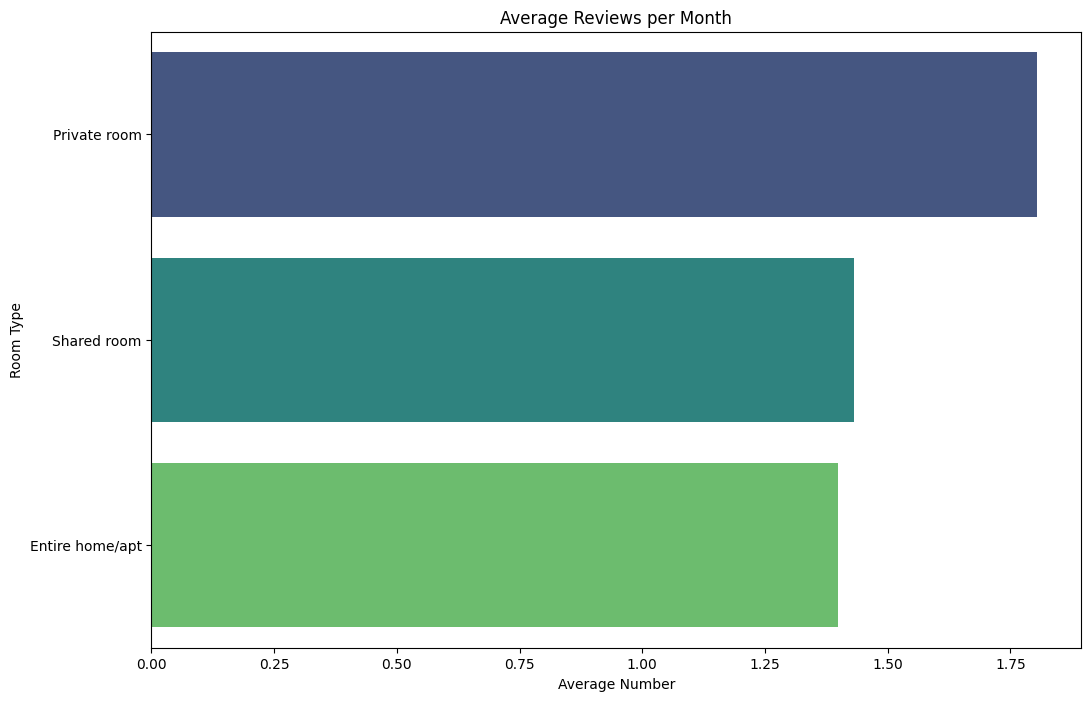

In [34]:
# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Reviews per Month', y='Room Type', hue='Room Type', data=average_reviews_per_month_by_room_type, palette='viridis', dodge=False, legend=False)

plt.title('Average Reviews per Month')
plt.xlabel('Average Number')
plt.ylabel('Room Type')
plt.show()